We see tons of different stores here and there through the web. Internet made it possible to trade with anyone and everywhere. We can buy goods without leaving our house, we can compare prices in different stores within seconds, we can find what we really want and do not accept just the first more or less suitable offer. And I believe it would be really interesting to look at this world through the data it produces. That's why I decided to play around with e-commerce numbers and try to understand it better.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 


## Libraries and Packeges

As always, we start our analysis by setting up our environment and by importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn import metrics
import time, warnings
import datetime as dt
import geopandas
from sklearn.metrics import average_precision_score
from scipy import stats
from matplotlib import pylab
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.cluster as cluster
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set()
warnings.filterwarnings("ignore")

/Users/AMINO/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cleaning the Data

In [2]:
# Reading the dataset

Original_df = pd.read_excel (r'Online Retail.xlsx')
Original_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Checking the shape

Original_df.shape

(541909, 8)

In [4]:
# Checking my column IDs

Original_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# How many unique values I have

Original_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [6]:
# Checking on the data type

Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# What are my countries 

Original_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
# Checking on the values 

Original_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Getting some more general information about the data

print("Number of transactions: ", Original_df['InvoiceNo'].nunique())
print("Number of products bought: ",Original_df['StockCode'].nunique())
print("Number of customers:", Original_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(Original_df['CustomerID'].isnull().sum() * 100 / len(Original_df),2),"%" )
print('Number of countries: ',Original_df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


### Checking and dealing with null/missing values

In [10]:
# Checking for Missing Values

Original_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As you can see CustomerID has a lot of null values and since we are doing sells prediction  this feature cannot help our prediction at this moment so we are just going to drop the CustomerID column

In [11]:
df = Original_df.drop(columns=['CustomerID'])

In [12]:
# Checking to see if NaN values were filtered out

df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

As you can see we still have null values left in the description so in our can instead deleting those rows we are going to impute them with 'UNKNOWN ITEM' at the moment 

In [13]:
df['Description'] = df['Description'].fillna('UNKNOWN ITEM')

In [14]:
# Checking to see if NaN values were filtered out

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [15]:
# WE still have 1 missing value and we are going to clear that out

df = df[df['Description'].notnull()]

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [17]:
# Lets make all the describtion upper case so it looks more clean

df['Description'] = df['Description'].str.upper()

In [18]:
# Lets check to make sure if it worked and see what customers bought often

df['Description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [19]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### Exploring the negative Quantity and UnitePrice

In [20]:
df[df['Quantity'] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,DISCOUNT,-1,2010-12-01 09:41:00,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,United Kingdom


As you can see all the negative quantity starts with 'C' in InvoiceNo. The negative quantities appears to be return/canceled/discount, and maybe unknown items.

In [21]:
# For our analysis lets remove them for now

df = df[df['Quantity'] > 0]

In [22]:
df.describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,10.655262,3.857296
std,156.830323,41.810047
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


As we can see we still have negative UnitPrice so let's filter out those as well

In [23]:
df = df[df['UnitPrice'] > 0]

In [24]:
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


### Checking for duplicates

In [26]:
# Checking for duplicates

print("Number of duplicated transactions:", len(df[df.duplicated()]))

Number of duplicated transactions: 5226


In [27]:
# Lets remove the duplicates

df.drop_duplicates(inplace = True)

In [28]:
# Checking again for duplicates

print("Number of duplicated transactions:", len(df[df.duplicated()]))

Number of duplicated transactions: 0


In [29]:
df.shape

(524878, 7)

## Feature Engineering 

In [30]:
df.isnull().values.any()

False

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.0+ MB


### Creating total sales column and Removing outliers

In [32]:
# Creating a another new column with the total value of each order

df['Total_Sales_Amount'] = df['Quantity'] * df['UnitPrice']

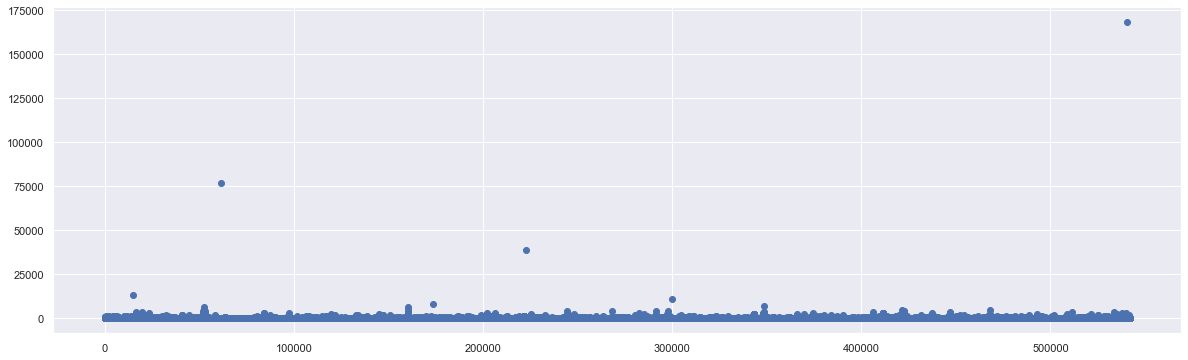

In [33]:
# Let's plot and any outliers

plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total_Sales_Amount'])
plt.show()

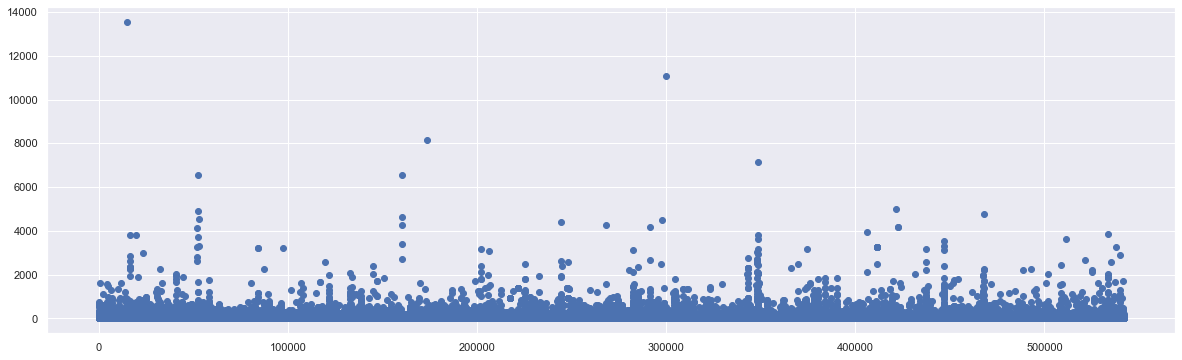

In [34]:
# let's remove our outliers

df = df[df['Total_Sales_Amount'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total_Sales_Amount'])
plt.show()

As you can see I have still some outliers so lets go deeper by breaking it into quantiles

In [35]:
df.quantile([0.05,0.80, 0.95, 0.97, 0.98, 0.99, 0.995, 0.996, 0.997, 0.998, 0.999])

,Quantity,UnitPrice,Total_Sales_Amount
0.050,1.0,0.42,1.25000
0.800,12.0,4.95,19.80000
0.950,30.0,9.95,59.80000
0.970,48.0,12.75,88.80000
0.980,72.0,14.95,122.40000
0.990,100.0,16.98,183.60000
0.995,160.0,24.96,296.12160
0.996,200.0,25.49,339.34112
0.997,240.0,33.29,403.71048
0.998,288.0,50.00,531.16380


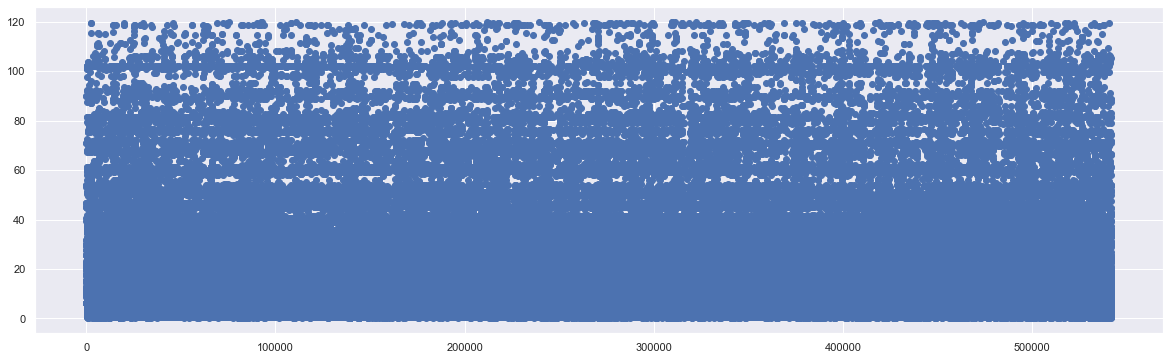

In [36]:
df = df[df['Total_Sales_Amount'] < 120]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total_Sales_Amount'])
plt.show()

In [37]:
df.describe()

,Quantity,UnitPrice,Total_Sales_Amount
count,514028.000000,514028.000000,514028.000000
mean,7.828480,3.290440,13.795887
std,15.076278,3.896026,15.885476
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.340000
max,1600.000000,119.770000,119.900000


In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [39]:
df = df[df['UnitPrice'] < 15]
df.describe()

,Quantity,UnitPrice,Total_Sales_Amount
count,505391.000000,505391.000000,505391.000000
mean,7.938141,2.973704,13.524121
std,15.180579,2.665444,15.673770
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.350000
75%,10.000000,4.130000,17.000000
max,1600.000000,14.960000,119.900000


### Quantity per invoice feature

Let's convert our InvoiceDate column to datetime so later on we break it down to year, month, hour, and other categories

In [40]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [42]:
df.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
Country                       object
Total_Sales_Amount           float64
dtype: object

Let's create out month column using datetime

In [43]:
df['Month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12


## Visulaizations

For the first visualization I want to see the top countries quantity sold

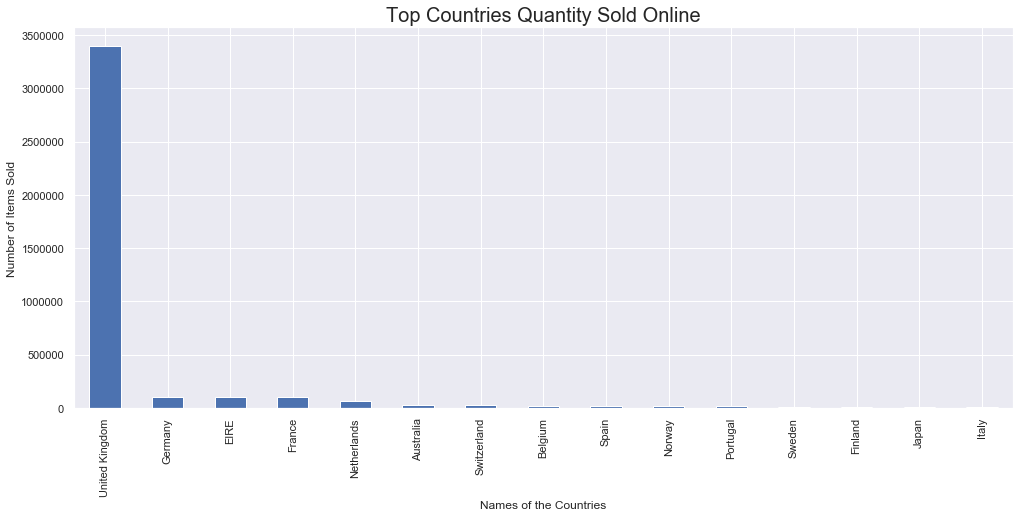

In [44]:
df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(15).plot.bar(figsize = (15, 7))

plt.title('Top Countries Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

Which country ordered the most

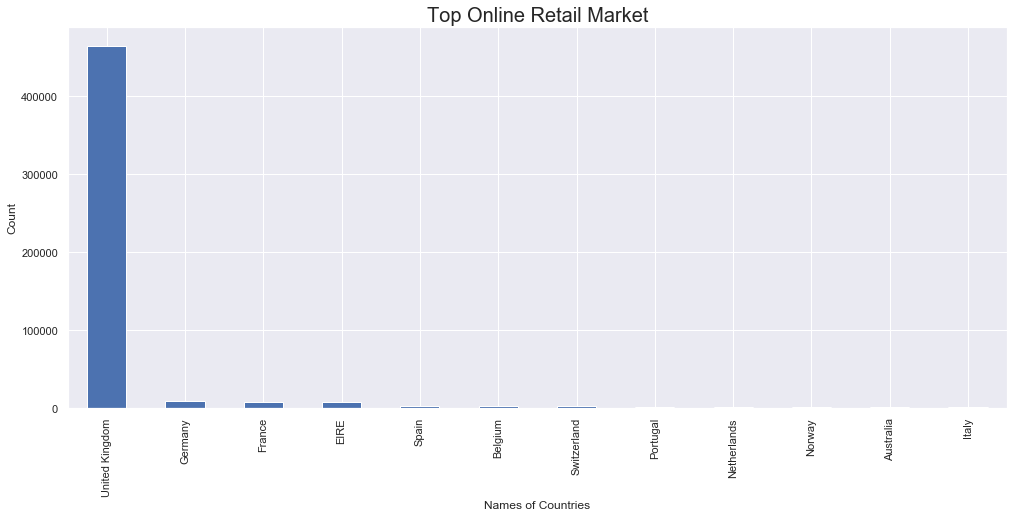

In [45]:
df['Country'].value_counts().head(12).plot.bar(figsize = (15, 7))
plt.title('Top Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

The biggest number of orders are made in United Kingdom

Now lets check what is our top selling products

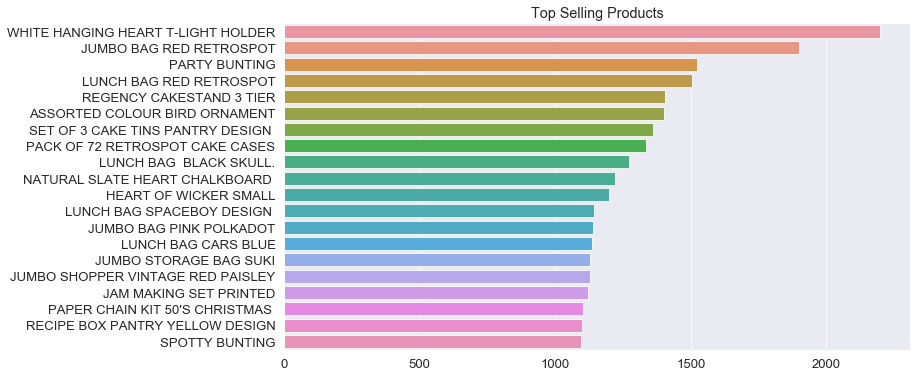

In [46]:
top_products = df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top Selling Products")
plt.show();

Let's break down our InvoiceDate to year, month, hour, and other categories 

In [47]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df['Hour'] = df['InvoiceDate'].dt.hour
df['Week'] = df['InvoiceDate'].dt.week
df['WeekDay'] = df['InvoiceDate'].dt.strftime('%A')
df['Day'] = df['InvoiceDate'].dt.day
df['Quarter'] = df['InvoiceDate'].dt.quarter

In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Sales_Amount,Month,Year,Date,Hour,Week,WeekDay,Day,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,12,2010,2010-12-01,8,48,Wednesday,1,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,2010,2010-12-01,8,48,Wednesday,1,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,12,2010,2010-12-01,8,48,Wednesday,1,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,2010,2010-12-01,8,48,Wednesday,1,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,2010,2010-12-01,8,48,Wednesday,1,4


Let's how many orders we are getting during the weekdays

In [49]:
Dy = pd.DataFrame(df.groupby(['WeekDay'])['InvoiceNo'].count())
Dy = Dy.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']).reset_index
Dy

<bound method DataFrame.reset_index of            InvoiceNo
WeekDay             
Monday       88932.0
Tuesday      94549.0
Wednesday    87838.0
Thursday     96238.0
Friday       76463.0
Saturday         NaN
Sunday       61371.0>

Interestingly we have got no orders on Saturday's. Maybe because they are closed or don't process invoices that day?

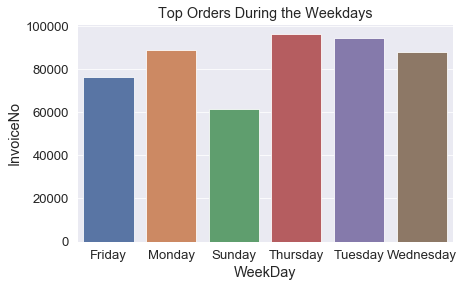

In [50]:
P1 = pd.DataFrame(df.groupby(['WeekDay'])['InvoiceNo'].count()).reset_index()
ax = sns.barplot(x="WeekDay", y="InvoiceNo", data = P1)
ax.set_title('Top Orders During the Weekdays')
plt.show()

Let's check our transactions per hour

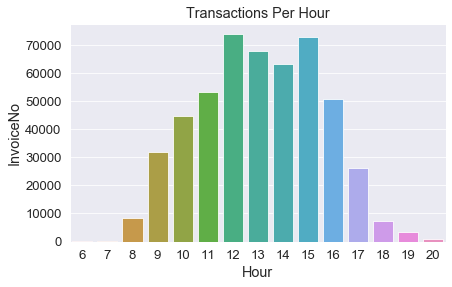

In [51]:
P2 = pd.DataFrame(df.groupby(['Hour'])['InvoiceNo'].count()).reset_index()
ax = sns.barplot(x= 'Hour', y= 'InvoiceNo', data = P2)
ax.set_title('Transactions Per Hour')
plt.show()

The most number of transactions is done between 12 p.m. and 2 p.m., people tend to make there purchase during the lunch time. There aren't any transactions after 8 p.m. till 6 a.m.

In [52]:
plot6 = pd.DataFrame(df.groupby(['Country'])['Total_Sales_Amount'].sum()).reset_index()
plot6 = plot6.sort_values(['Total_Sales_Amount']).reset_index(drop=True)

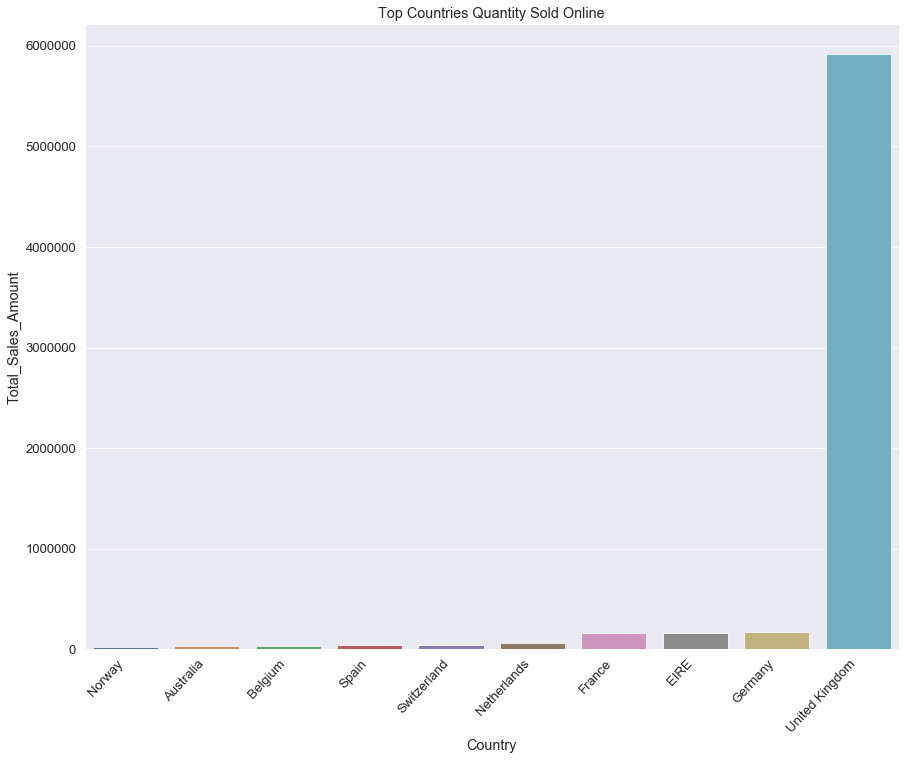

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Total_Sales_Amount', data=plot6.tail(10), estimator=max, ax= ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
ax.set_title('Top Countries Quantity Sold Online')
plt.show()

The most sales are in United Kingdom

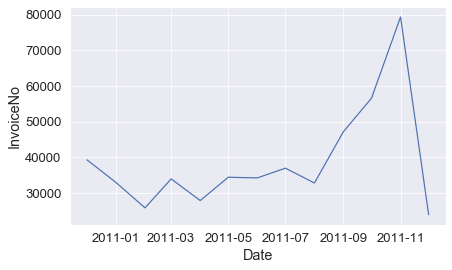

In [54]:
P3 = pd.DataFrame(df.groupby(['Date'])['InvoiceNo'].count()).reset_index()
ax = sns.lineplot(x="Date", y="InvoiceNo", data = P3)

There are more purchasing made at the end of the year

Lets check our top product that generated the most revenue

In [55]:
Top_Rev = df.groupby('Description',as_index=False)['Total_Sales_Amount','Quantity'].sum().sort_values(by='Total_Sales_Amount',
                                                                                               ascending=False).head(10)
Top_Rev['AvgUnitPrice'] = Top_Rev.Total_Sales_Amount/Top_Rev.Quantity

In [56]:
TotalRev = round(df.Total_Sales_Amount.sum(),0)

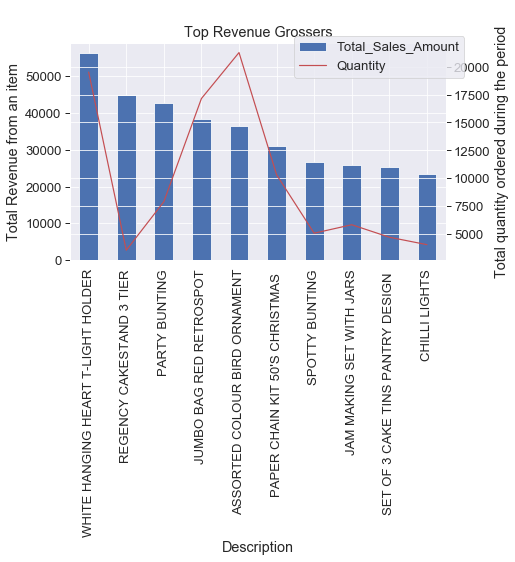

In [57]:
ax = Top_Rev.plot(x= 'Description', y= 'Total_Sales_Amount', legend=False,kind='bar')
ax2 = ax.twinx()
Top_Rev.plot(x= 'Description', y= 'Quantity', ax=ax2, legend=False, color="r")

ax.figure.legend(loc=(.57,.86))
plt.title('Top Revenue Grossers')
ax.set_ylabel('Total Revenue from an item')
ax2.set_ylabel('Total quantity ordered during the period')
plt.show()

We are going to build a heatmap to check the correlation between our Features

In [58]:
Corr = df.drop(labels=['InvoiceNo','Description','InvoiceDate','Country'], axis=1)

In [59]:
#Corr = df[['Date','StockCode', 'Quantity','UnitPrice','Total_Sale_Amount', 'Week', 'WeekDay','Day']]

In [60]:
Corr.head()

,StockCode,Quantity,UnitPrice,Total_Sales_Amount,Month,Year,Date,Hour,Week,WeekDay,Day,Quarter
0,85123A,6,2.55,15.30,12,2010,2010-12-01,8,48,Wednesday,1,4
1,71053,6,3.39,20.34,12,2010,2010-12-01,8,48,Wednesday,1,4
2,84406B,8,2.75,22.00,12,2010,2010-12-01,8,48,Wednesday,1,4
3,84029G,6,3.39,20.34,12,2010,2010-12-01,8,48,Wednesday,1,4
4,84029E,6,3.39,20.34,12,2010,2010-12-01,8,48,Wednesday,1,4


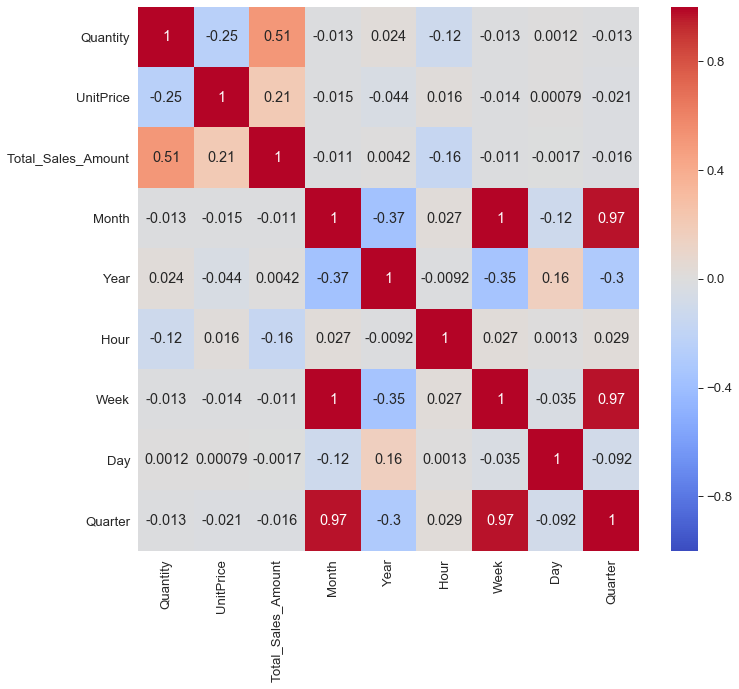

In [61]:
# Plotting heatmap

Heatmap = Corr.corr()
tcf = Heatmap.index
plt.figure(figsize=(10,10))
g=sns.heatmap(Corr[tcf].corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,center=0)
